# Math 134C Week 9

In [3]:
import math
import numpy as np
from scipy.stats import norm
from scipy.stats.mstats import gmean

def black_scholes_call(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))
    d2 = d1 - sigma * np.sqrt(dt)
    call_price = S_t * np.exp(-delta * dt) * norm.cdf(d1) - K * np.exp(-r * dt) * norm.cdf(d2)
    return call_price

def black_scholes_put(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))
    d2 = d1 - sigma * np.sqrt(dt)
    call_price = - S_t * np.exp(-delta * dt) * norm.cdf(-d1) + K * np.exp(-r * dt) * norm.cdf(-d2)
    return call_price

def call_Delta(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))  
    return np.exp(-delta * dt) * norm.cdf(d1)

def put_Delta(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))  
    return -np.exp(-delta * dt) * norm.cdf(-d1)

def Gamma(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))
    return np.exp(-delta * dt) * norm.pdf(d1)/(S_t * sigma * np.sqrt(dt)) 

def call_Theta(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))
    d2 = d1 - sigma * np.sqrt(dt)
    return delta * S_t * np.exp(-delta * dt)*norm.cdf(d1) - r * K * np.exp(-r*dt)*norm.cdf(d2)-(K * np.exp(-r*dt) * sigma * norm.pdf(d2))/ (2 * np.sqrt(dt)) 

def put_Theta(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))
    d2 = d1 - sigma * np.sqrt(dt)
    return call_Theta(S_t, K, dt, r, sigma, delta) + r * K * np.exp(-r*dt) - delta * S_t * np.exp(-delta * dt)

def put_given_call(C_t, S_t, K, r, dt):
    return C_t - S_t + K * math.exp(-r * dt)
def call_given_put(P_t, S_t, K, r, dt):
    return P_t + S_t - K * math.exp(-r * dt)

def one_step_binomial(r, dt, u, d, Vu, Vd, delta = 0):
    q = (math.exp((r - delta) * dt) - d)/(u-d)
    if not (1 > q > 0): 
        print("Arbitrage opportunity exists")
        return -1
    return math.exp(-r * dt)*(q*Vu+(1-q)*Vd)    

**Quiz 8.1**
![](img/week9_1.png)

In [3]:
price = [31, 35, 40, 38, 39, 36]
amean_price = np.mean(price)
gmean_price = gmean(price)
print(f"The arithmetic mean of the price is {amean_price:.2f}")
print(f"The geometric mean of the price is {gmean_price:.2f}")
payoff_A = max(0, amean_price - 36)
payoff_B = max(0, gmean_price - 35)
print(f"The value of 100(B-A) is {100*(payoff_B-payoff_A):.2f}")

The arithmetic mean of the price is 36.50
The geometric mean of the price is 36.37
The value of 100(B-A) is 87.25


**Quiz 8.2**
![](img/week9_2.png)

In [91]:
u = np.exp((0.03-0.01)*0.5 + 0.3 * np.sqrt(0.5))
d = np.exp((0.03-0.01)*0.5 - 0.3 * np.sqrt(0.5))

S = 40
Su = S * u
Sd = S * d
Suu = Su * u
Sud = Su * d
Sdd = Sd * d

Average_uu = gmean([Su, Suu])
Average_ud = gmean([Su, Sud])
Average_du = gmean([Sd, Sud])
Average_dd = gmean([Sd, Sdd])

P_uu = max(0, Average_uu - Suu)
P_ud = max(0, Average_ud - Sud)
P_du = max(0, Average_du - Sud)
P_dd = max(0, Average_dd - Sdd)

q = (np.exp(0.02 * 0.5) - d)/(u-d)

# One method to compute the price at each node
P_u = np.exp(-0.03 * 0.5) * (q * P_uu + (1-q) * P_ud)
P_d = np.exp(-0.03 * 0.5) * (q * P_du + (1-q) * P_dd)
P = np.exp(-0.03 * 0.5) * (q * P_u + (1-q) * P_d)

# Another method to compute the price directly
# P = np.exp(-0.03) * (q**2 * P_uu + q*(1-q) * P_ud + q*(1-q)*P_du + (1-q)**2*P_dd)
print(f"The price of this option is {P:.1f}")

The price of this option is 1.9


**Quiz 8.3**
![](img/week9_3.png)

**Quiz 8.4**
For this problem, please construct a two-period binomial model
![](img/week9_4.png)

In [93]:
u = np.exp((0.06-0.05) + 0.3)
d = np.exp((0.06-0.05) - 0.3)
S = 100
Su = S * u
Sd = S * d
Suu = S * u * u
Sud = S * u * d
Sdd = S * d * d

Puu = 0
Pud = 0
Pdu = 120 - Sud
Pdd = 120 - Sdd
q = (np.exp(0.01) - d)/(u-d)
Pu = 0
Pd = np.exp(-0.06) * (q * Pdu + (1-q) * Pdd)

P = np.exp(-0.06) * (q * Pu + (1-q) * Pd)
print(f"The price of this option is {P:.2f}")

The price of this option is 22.63


**Quiz 8.5**
![](./img/week9_5.png)

**Quiz 8.6**
![](img/week9_6.png)
You are also given that the volatility of the stock is less than 100%.

In [11]:
delta = 0.61791
r = 0.1
S = 50
T = 0.25

sigma = 0.2

# delta_guessed = call_Delta(S, S, T, r, sigma, 0)
# print(delta_guessed)

dS = 0.52
C_old = black_scholes_call(S, S, T, r, sigma, 0)
C_new = black_scholes_call(S+dS, S, T-1/365, r, sigma, 0)

profit = -(C_new - C_old) + dS * delta - (-C_old + delta * S) * (np.exp(r/365) - 1)
print("The one day profit is", profit, "if the stock price changes by", dS)

The one day profit is 0.0005801055773632961 if the stock price changes by 0.52


**Quiz 8.7**
![](img/week9_7.png)

**Quiz 8.8**
![](img/week9_8.png)

**Quiz 8.9**
![](img/week9_9.png)

**Quiz 8.10**
![](img/week9_10.png)

# Delta-Gamma Hedge
The delta-hedged portfolio is still under the exposure of risk especially when the option is at the money (This is called the **pin risk** of delta-hedged portfolio). This is where $\Gamma$ of the option is maximized. To eliminate this risk, we also hedge our portfolio so that it is Gamma-neutral. However, this cannot be done by adding shares of stock, as the stock has zero gamma. Thus, we use the underlying stock, and another option to delta-gamma hedge our portfolio. 

**Example**
Suppose that $S = 40, \sigma = 0.3, r = 0.08, \delta = 0$. Compute the delta and gamma of $40$ and $45$ strike call options. Suppose that we just sell 1000 units of the $40$-strike call option. How would we delta-gamma hedge our position? 

In [14]:
S = 40
sigma = 0.3
r = 0.08
delta = 0
T = 1

delta_45 = call_Delta(S, 45, T, r, sigma, delta)
delta_40 = call_Delta(S, 40, T, r, sigma, delta)
gamma_45 = Gamma(S, 45, T, r, sigma, delta)
gamma_40 = Gamma(S, 40, T, r, sigma, delta)

print(delta_45, delta_40, gamma_45, gamma_40)

c1 = 1000*gamma_40/gamma_45
c2 = 1000*delta_40-c1 * delta_45
print(f"We should buy {c1:.3f} units of the 45-strike call, and buy {c2:.3f} shares of the stock")

0.509596248447661 0.6615388804893103 0.03323557163859403 0.0304810305345002
We should buy 917.121 units of the 45-strike call, and buy 194.178 shares of the stock


# Compound Options
A **compound option** is an option on an option. We denote $x, t_1$ to denote the strike and expiry date of the compound option, and $K, T$ to denote the strike and expiry date of the underlying option. For example, a **call-on-call** compound option gives you right to purchase a call option at the price $x$ at the expiry date $t_1$, and the underlying call options has strike $K$ and expiry date $T>t_1$.

For a call-on-call option to have non-zero value, we need that at time $t_1$, the price of the call option $C(S_{t_1}, K, T-t_1)$ should be higher than the strike $x$, and at the expiry date, the stock price should be higher than the strike $K$.

We can use binomial tree method, or monte carlo method to compute the price of a compound option.

**Example**
Use the binomial model of two period for the following computation, where each period is one year.

Consider a call on call option, which gives you right to purchase a call option at price $5$ in 1 year, and the call option has expiry date in 1 year after, with a strike 110. 

Suppose that the underlying stock has current price 100, and $u=1.2, d = 0.8$ and has $\delta = 0.01$. Suppose that the risk-free rate is $0.05$. Compute the price of this compound option.

In [17]:
q = (np.exp(0.05-0.01)-0.8)/(1.2-0.8)
print(q)
Cu = np.exp(-0.05) * (q * 34)
print(Cu)
P = np.exp(-0.05) * (q * (Cu-5))
print(P)

0.6020269354809705
19.470635002630733
8.286836835073982


**Example**
Suppose $u = 1.2, d = 0.8, r = 0.05, \delta = 0, S_0 = 100$. Consider a call-on-call option with strike 5, and expiry date in 1 year, and the underlying call option has strike 110 and expires 2 year after. 

Use 3 period binomial tree to compute the price of this call-on-call option.

In [23]:
Cuud = 100 * 1.2 * 1.2 * 0.8
Cuuu = 100 * 1.2 * 1.2 * 1.2
print(Cuud)
print(Cuuu)

q = (np.exp(0.05)-0.8)/(1.2-0.8)

Cu = np.exp(-0.05 * 2) * (q**2 * 62.8 + 2 * q * (1-q) * 5.2 + (1-q)**2 * 0)
Cd = np.exp(-0.05 * 2) * (q**2 * 5.2)
print(Cu, Cd)
P = np.exp(-0.05) * q * (Cu-5)
print(P)

115.2
172.79999999999998
24.6210511238336 1.8566882211108318
11.724385472337357


# Monte Carlo Methods

**Example**
In the first 4 problems please assume the risk-free annual interest rate is 5.35% and the underlying stock has a current price of 41.75 and volatility of 0.34. Also assume there are 61 days until expiration. For each option you must compute its value using the Monte Carlo simulation method presented in Lecture 16 and plot a histogram of all the option prices obtained in the simulation

1 ) Using the Monte Carlo methodology, compute the value of a European put option with a strike price of 45 using 10,000 trials.

4 ) Using the Monte Carlo methodology, compute the value of an exotic Asian-style arithmetic average strike European put option using 10,000 trials.

 The price of this European put option computed from Monte-Carlo method is 4.04
 The price computed by the black scholes formula is 4.08


<AxesSubplot:>

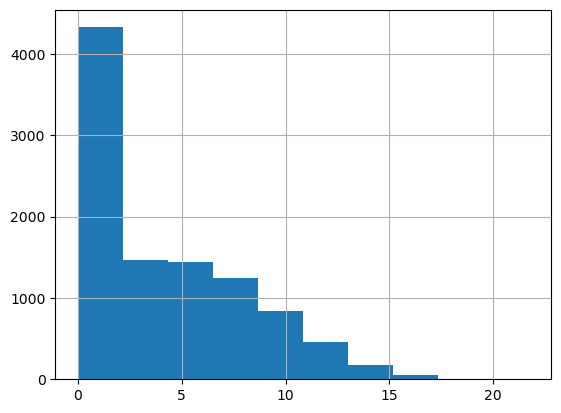

In [6]:
# 1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def stock_price_simulation(T, N, r, delta, sigma, S0):
    dt = float(T) / N
    t = np.linspace(0, T, N+1)
    S = np.zeros(N+1)
    S[0] = S0
    for i in range(1, N+1):
        Z = np.random.normal(0, 1)
        S[i] = S[i-1] * np.exp((r - delta - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    return t, S

T = 61/365
N = 1000
r = 0.0535
delta = 0
sigma = 0.34
S0 = 41.75

number_of_trials = 10000

price = []
for i in range(number_of_trials):
    t, S = stock_price_simulation(T, N, r, delta, sigma, S0)    
    price.append(max(0, 45-S[-1]) * np.exp(-r * T))
    
price_data = pd.Series(price)

print(f" The price of this European put option computed from Monte-Carlo method is {price_data.mean():.2f}")
print(f" The price computed by the black scholes formula is {black_scholes_put(S0, 45, T, r, sigma, delta):.2f}")
price_data.hist()


The price for this Arithmetic average strike put option is 1.21


<AxesSubplot:>

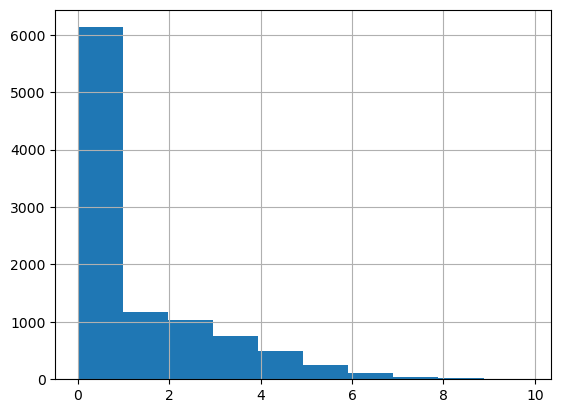

In [9]:
# 4
number_of_trials = 10000

price = []
for i in range(number_of_trials):
    t, S = stock_price_simulation(T, N, r, delta, sigma, S0)    
    price.append(max(0, np.mean(S) - S[-1]) * np.exp(-r))
    
price_data = pd.Series(price)

print(f"The price for this Arithmetic average strike put option is {price_data.mean():.2f}")
price_data.hist()


**Diagram shows that the one day profit depends only on the magnitude of the change in stock price, not on its direction**

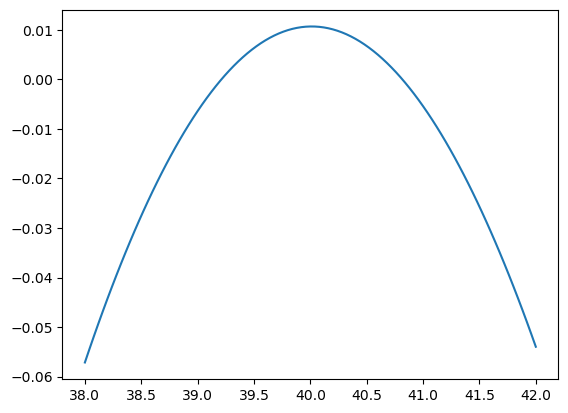

In [55]:
import matplotlib.pyplot as plt

S = 40
K = 45
r = 0.05
delta = 0
sigma = 0.3
T = 1


dS_list = np.linspace(-2,2, 101)
call_delta = call_Delta(S, K, T, r, sigma, delta)
price_old = black_scholes_call(S, K, T, r, sigma, delta)

one_day_profit = []
S_list = []
for dS in dS_list:
    S_list.append(S+dS)
    profit = call_delta * (dS) - (black_scholes_call(S+dS, K, T-1/365, r, sigma,delta) - price_old) + (call_delta * S - price_old) * (np.exp(r/365) - 1)
    one_day_profit.append(profit)
plt.plot(S_list, one_day_profit)
plt.show()

# Homework Solution

**Exercise 13.14**
Consider a put for which T = 0.5 and K = 45. Compute the Greeks and verify that equation (13.9) is zero.

In [51]:
S = 40
sigma = 0.3
r = 0.08
delta = 0
T = 0.5
K = 45
put_delta = put_Delta(S, K, T, r, sigma, delta)
gamma = Gamma(S, K, T, r, sigma, delta)
theta = put_Theta(S, K, T, r, sigma, delta)
print(f"The delta, gamma, theta of this put option is {put_delta:.4f}, {gamma:.4f}, {theta:.4f}")
P = black_scholes_put(S, K, T, r, sigma, delta)
print(f"The price of this put option is {P:.2f}")

The delta, gamma, theta of this put option is -0.6028, 0.0454, -0.9139
The price of this put option is 5.37


We verify that 
$$0.5 \cdot \sigma^2S^2\Gamma+\theta+r(\Delta S - P(S_t)) = 0.5\cdot 0.3^2\cdot 40^2\cdot 0.05 -0.91 + 0.08\cdot(-0.6\cdot 40 - 5.37) = 3.2688-0.9139-2.35856 \approx 0$$

**Exercise 13.15**
You own one 45-strike call with 180 days to expiration. Compute and graph the 1-day holding period profit if you delta- and gamma-hedge this position using a 40-strike call with 180 days to expiration.


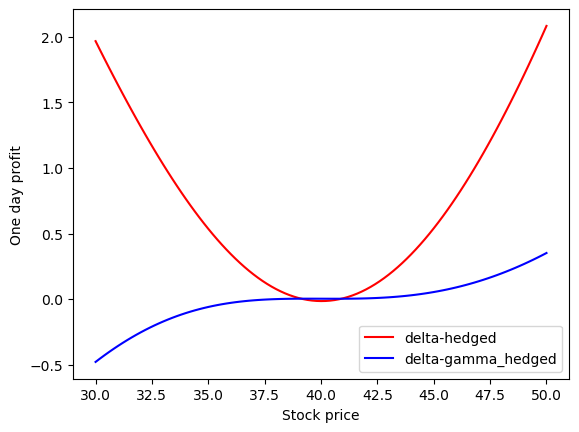

In [87]:
S = 40
sigma = 0.3
r = 0.08
delta = 0
T = 0.5
K = 45

dS_list = np.linspace(-10,10, 101)
call_delta = call_Delta(S, K, T, r, sigma, delta)
price_old = black_scholes_call(S, K, T, r, sigma, delta)
gamma_1 = Gamma(S, K, T, r, sigma, delta)

# Compute the number of shares in the stock and in the second call option
call_delta_2 = call_Delta(S, 40, T, r, sigma, delta)
gamma_2 = Gamma(S, 40, T, r, sigma, delta)
price_old_2 = black_scholes_call(S, 40, T, r, sigma, delta)
shares_2 = -gamma_1/gamma_2
shares_stock = -(call_delta + shares_2 * call_delta_2)

delta_gamma_hedged_one_day_profit = []
delta_hedged_one_day_profit = []
S_list = []
for dS in dS_list:
    S_list.append(S+dS)
    profit = -call_delta * (dS) + (black_scholes_call(S+dS, K, T-1/365, r, sigma,delta) - price_old) + (price_old-call_delta * S) * (np.exp(r/365) - 1)
    delta_hedged_one_day_profit.append(profit)
    
    profit_2 = shares_stock * dS + (black_scholes_call(S+dS, K, T-1/365, r, sigma,delta) - price_old) + shares_2 * (black_scholes_call(S+dS, 40, T-1/365, r, sigma,delta) - price_old_2) + (price_old + shares_stock * S + shares_2 * price_old_2) * (np.exp(r/365) - 1)
    delta_gamma_hedged_one_day_profit.append(profit_2)
    
plt.plot(S_list, delta_hedged_one_day_profit, color = "red", label = "delta-hedged")
plt.plot(S_list, delta_gamma_hedged_one_day_profit, color = "blue", label = "delta-gamma_hedged")
plt.legend()
plt.xlabel("Stock price")
plt.ylabel("One day profit")
plt.show()

**Exercise 13.17**
You have written a 35–40–45 butterfly spread with 91 days to expiration. Compute and graph the 1-day holding period profit if you delta- and gamma-hedge this position using the stock and a 40-strike call with 180 days to expiration.

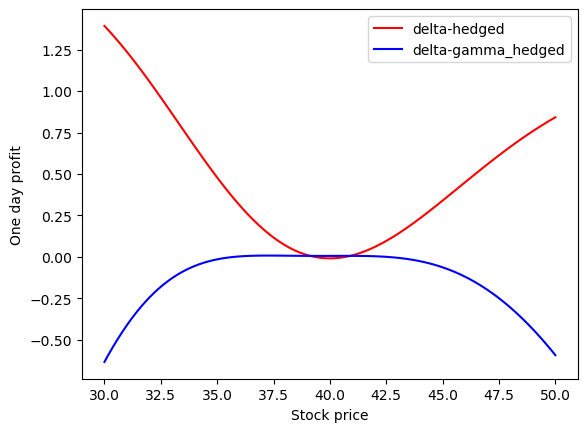

In [89]:
S = 40
sigma = 0.3
r = 0.08
delta = 0
T = 91/365

def price_spread(S, T, r, sigma, delta):
    return -2 * black_scholes_call(S, 40, T, r, sigma, delta) + black_scholes_call(S, 35, T, r, sigma, delta) + black_scholes_call(S, 45, T, r, sigma, delta)

dS_list = np.linspace(-10,10, 101)

delta_spread = -2 * call_Delta(S, 40, T, r, sigma, delta) + call_Delta(S, 35, T, r, sigma, delta) + call_Delta(S, 45, T, r, sigma, delta)
gamma_spread = -2 * Gamma(S, 40, T, r, sigma, delta) + Gamma(S, 35, T, r, sigma, delta) + Gamma(S, 45, T, r, sigma, delta)
price_old = price_spread(S, T, r, sigma, delta)

gamma_2 = Gamma(S, 40, 0.5, r, sigma, delta)
delta_2 = call_Delta(S, 40, 0.5, r, sigma, delta)
shares_2 = -(-gamma_spread/gamma_2)
shares_stock = -(-delta_spread + shares_2 * delta_2)
price_old_2 = black_scholes_call(S, 40, 0.5, r, sigma, delta)

delta_hedged_one_day_profit = []
delta_gamma_hedged_one_day_profit = []

for dS in dS_list:
    price_new = price_spread(S+dS, T-1/365, r, sigma, delta)
    price_new_2 = black_scholes_call(S+dS, 40, 0.5-1/365, r, sigma, delta)
    profit_1 = delta_spread * dS - (price_new - price_old) + (delta_spread * S - price_old) * (np.exp(r/365) - 1)
    delta_hedged_one_day_profit.append(profit_1)
    
    profit_2 = shares_stock * dS - (price_new-price_old) + shares_2 * (price_new_2-price_old_2) + (shares_stock * S + shares_2 * price_old_2 - price_old) * (np.exp(r/365)-1)
    delta_gamma_hedged_one_day_profit.append(profit_2)

plt.plot(S_list, delta_hedged_one_day_profit, color = "red", label = "delta-hedged")
plt.plot(S_list, delta_gamma_hedged_one_day_profit, color = "blue", label = "delta-gamma_hedged")
plt.xlabel("Stock price")
plt.ylabel("One day profit")
plt.legend()
plt.show()